# Peringkasan Teks Abstraktif dengan BART

## Import Libraries

In [1]:
!pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 79.4 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 29.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.33.1
    Uninstalling huggingface-hub-0.33.1:
      Successfully uninstalled huggingface-hub-0.33.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.5.1 which is incompatible.


In [2]:
import transformers
print(transformers.__version__)

4.55.0


In [3]:
!pip install pandas \
    numpy \
    tqdm \
    torch \
    transformers \
    datasets \
    evaluate \
    accelerate \
    scikit-learn \
    nltk \
    matplotlib \
    seaborn \
    symspellpy \
    wordcloud \
    PyPDF2 \
    rouge_score 

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.3 MB

In [4]:
import pandas as pd
import time
import csv
import os
import requests 
import nltk
import re
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import torch
import numpy as np
import evaluate
import accelerate
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import pkg_resources # menemukan lokasi file kamus jika diinstal sebagai bagian dari package
from nltk.tokenize import sent_tokenize
from symspellpy import SymSpell, Verbosity
from datasets import Dataset
from PyPDF2 import PdfReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from torch.utils.data import TensorDataset, DataLoader
from transformers import BartForConditionalGeneration, Trainer, TrainingArguments, DataCollatorForSeq2Seq, EarlyStoppingCallback, BartTokenizer
from accelerate import Accelerator
from sklearn.model_selection import train_test_split 
nltk.download('punkt')       # Tokenizer
nltk.download('stopwords')  # Stopword list
nltk.download('wordnet')    # WordNet lemmatizer

2025-08-10 05:44:00.434398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754804640.626731      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754804640.681612      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
!nvidia-smi

Sun Aug 10 05:44:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P0             26W /  250W |       3MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
# Pengecekan konfigurasi model BART
from transformers import BartModel
model = BartModel.from_pretrained("facebook/bart-large-cnn")
print(model.config)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

BartConfig {
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_final_layer_norm": false,
  "architectures": [
    "BartForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 12,
  "eos_token_id": 2,
  "force_bos_token_to_be_generated": true,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "length_penalty": 2.0,
  "ma

## Data Scraping + Merged Data

## Ekstraksi Full Text PDF

In [ ]:
# Folder untuk menyimpan file PDF
pdf_dir = "pdfs_arxiv_data"
os.makedirs(pdf_dir, exist_ok=True)

In [ ]:
def is_valid_url(url):
    try:
        response = requests.head(url, timeout=5)
        return response.status_code == 200
    except requests.exceptions.RequestException:
        return False

# Tambahkan kolom 'Valid URL' ke DataFrame
df['Valid URL'] = df['PDF Link'].apply(is_valid_url)

In [ ]:
# Pisahkan yang valid
df_valid = df[df['Valid URL'] == True].reset_index(drop=True)

In [ ]:
# Simpan daftar URL valid ke dalam CSV
df_valid.to_csv("valid_pdf_links.csv", index=False)

In [ ]:
# Tampilkan URL yang tidak valid
invalid_urls = df[df['Valid URL'] == False]
print(invalid_urls)

In [ ]:
def download_pdf(pdf_link, save_path):
    try:
        response = requests.get(pdf_link, timeout=10)
        if response.status_code == 200:
            with open(save_path, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded: {save_path}")
        else:
            print(f"Failed to download {pdf_link}: {response.status_code}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {pdf_link}: {e}")

In [ ]:
for index, row in df.iterrows():
    pdf_link = row['PDF Link']
    response = requests.head(pdf_link)
    if response.status_code == 404:
        print(f"Invalid URL: {pdf_link}")

In [ ]:
# Fungsi untuk membaca teks dari file PDF
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        full_text = " ".join([page.extract_text() for page in reader.pages if page.extract_text()])
        return full_text
    except Exception as e:
        print(f"Error membaca PDF {pdf_path}: {e}")
        return None

In [ ]:
# Kolom untuk menyimpan teks penuh
df['full_text'] = None

In [ ]:
# Terapkan pembersihan karakter tidak valid ke semua kolom string
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].apply(remove_invalid_characters)

In [ ]:
# Simpan dataset ke CSV
output_path = "Data Ekstraksi Full Text.csv" 
try:
    df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"Dataset berhasil disimpan di: {output_path}")
except UnicodeEncodeError as e:
    print(f"UnicodeEncodeError: {e}. Mencoba menyimpan dengan encoding alternatif...")
    # Simpan dengan encoding alternatif
    df.to_csv(output_path, index=False, encoding='utf-8-sig')
    print(f"Dataset berhasil disimpan dengan encoding alternatif di: {output_path}")

In [ ]:
data_fix = pd.read_csv("/kaggle/input/preprocessing/data_prepocessing fix.csv")
data_fix 

## Preprocessing Data

### Cleaning Data

In [ ]:
# Fungsi cleaning utama
def clean_text_for_summarization(text):
    if not isinstance(text, str) or text.strip() == "":
        return "no content"

    # Ubah ke lowercase
    text = text.lower()

    # Hapus semua kata sebelum dan termasuk kata "abstract"
    text = re.sub(r'^.*?\babstract\b', '', text, flags=re.IGNORECASE)

    # Hapus email dan URL
    text = re.sub(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+', '', text)
    text = re.sub(r'http\S+|www\S+|doi:\S+|arxiv:\S+', '', text)

    # Hapus istilah yang tidak informatif
    text = re.sub(r'\b(university|department|shanghai|institute|china|gmail\.com)\b', '', text)

    # Hapus karakter non-ASCII dan simbol aneh
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'[^\w\s.,;:!?()-]', '', text)

    # Hapus kata satu huruf tak bermakna (kecuali "a" dan "i")
    text = re.sub(r'\b[b-hj-z]\b', '', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    return text.strip()

In [ ]:
data_fix['clean_full_text'] = data_fix['full_text'].astype(str).apply(
    lambda x: clean_text_for_summarization(x)
)

data_fix['clean_summary'] = data_fix['Summary'].astype(str).apply(
    lambda x: clean_text_for_summarization(x)
)

In [ ]:
# Memastikan nilai NaN dalam bentuk aslinya
data_fix.replace(["NaN", "nan", "None", ""], np.nan, inplace=True)

# Menghapus baris yang masih memiliki NaN 
data_fix.dropna(subset=['clean_full_text', 'clean_summary'], inplace=True)

data_fix.reset_index(drop=True, inplace=True)

print(f"Jumlah baris setelah cleaning: {len(data_fix)}")
print(data_fix[['clean_full_text', 'clean_summary']].head())

### Koreksi Ejaan

In [ ]:
# Inisialisasi SymSpell untuk koreksi ejaan
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

In [ ]:
def correct_spelling(text):
    words = text.split()
    corrected_words = []
    
    for word in words:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            corrected_words.append(suggestions[0].term)  
        else:
            corrected_words.append(word) 

    return " ".join(corrected_words)

In [ ]:
# Terapkan koreksi ejaan
data_fix["corrected_full_text"] = data_fix["clean_full_text"].apply(correct_spelling)
data_fix["corrected_summary"] = data_fix["clean_summary"].apply(correct_spelling)

In [ ]:
data_fix

In [ ]:
# Simpan hasil cleaning ke file CSV
data_fix.to_csv("data_cleaning.csv", index=False, encoding='utf-8')
data_fix

### Tokenization

In [ ]:
# Tokenisasi
data_fix['tokens'] = data_fix['corrected_full_text'].apply(word_tokenize)
data_fix['tokens_summary'] = data_fix['corrected_summary'].apply(word_tokenize)

In [ ]:
data_fix

### Normalisasi

In [ ]:
# Normalisasi tokens (menghapus karakter non-alfabet)
def normalize_tokens(tokens):
    normalized = [re.sub(r"[^a-zA-Z.,'\"\s]", "", token).lower() for token in tokens]
    return [token for token in normalized if token] 

# Terapkan normalisasi
data_fix['tokens'] = data_fix['tokens'].apply(normalize_tokens)
data_fix['tokens_summary'] = data_fix['tokens_summary'].apply(normalize_tokens)

### Stopword Removal

In [ ]:
# Load stopwords default dari NLTK
stop_words = set(stopwords.words("english"))

In [ ]:
additional_stopwords = set([
    # Singkatan ilmiah atau teknikal 
    "et", "al", "al.", "e.g", "i.e", "etc", "fig", "table", "pp", "ieee", 
    "https", "doi", "org", "arxiv", "cs.CL", "cs.ne", "WCLBBCD", "AIAided", "arXiv.v", "cs.NE", "SPYX", "IBRARY",
    "article",  "template", "finbert-mrc:",  "csc", "mar", "2023german", "wcl-bbcd:",

    # Huruf atau karakter noise hasil scraping
    "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x",
    "j", "s", "m", "n", "x", "r", "f", "l", "h", "g", "w", "v",

    # Kata benar-benar tidak informatif atau out-of-context
    "b", "c", "d", "e", "i", "k", "o", "p", "q", "t", "u", "y", "z","j", "s", "m", "n", "x", "r", "c", "b", "f", "l", "h", "g", "w", "v",  
    "compar", "requir", "appli", "proceedings", "WCLBBCD", "ii", "cs.cl", 

    "using", "used", "shown",  
    "figure", "table", "values",  
    "generally", "several", "various", "particular"  
])

In [ ]:
# Gabungkan stopwords NLTK dengan tambahan
custom_stopwords = stop_words.union(additional_stopwords)

In [ ]:
data_fix['tokens_no_stopwords'] = data_fix['tokens'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in custom_stopwords]
)

data_fix['tokens_summary_no_stopwords'] = data_fix['tokens_summary'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in custom_stopwords]
)

In [ ]:
data_fix

### Lemmatization

In [ ]:
# Inisialisasi
lemmatizer = WordNetLemmatizer()

# Mapping POS
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Fungsi lemmatization berbasis POS
def lemmatize_with_pos(tokens):
    tagged_tokens = pos_tag(tokens, lang='eng')
    return [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in tagged_tokens]

In [ ]:
# Terapkan lemmatization berbasis POS
data_fix['tokens_text_lemmatized'] = data_fix['tokens_no_stopwords'].apply(lemmatize_with_pos)
data_fix['tokens_summary_lemmatized'] = data_fix['tokens_summary_no_stopwords'].apply(lemmatize_with_pos)

In [ ]:
data_fix

In [ ]:
# Simpan hasil cleaning ke file CSV
data_fix.to_csv("data_prepocessing fix.csv", index=False, encoding='utf-8')
data_fix

## Exploratory Data Analysis (EDA)_RAW DATA

In [6]:
data_raw = pd.read_csv("/kaggle/input/data-ekstrak-pdf/Data Ekstraksi Full Text.csv")
data_raw

,Title,Link,Published,PDF Link,Authors,Summary,full_text
0,Clinical Trial Information Extraction with BERT,http://arxiv.org/abs/2110.10027v1,2021-09-11T17:15:10Z,http://arxiv.org/pdf/2110.10027v1,"Xiong Liu, Greg L. Hersch, Iya Khalil, Murthy ...",Natural language processing (NLP) of clinical ...,\n Clinical Trial Information Extraction with...
1,Extraction of Medication and Temporal Relation...,http://arxiv.org/abs/2310.02229v2,2023-10-03T17:37:22Z,http://arxiv.org/pdf/2310.02229v2,"Hangyu Tu, Lifeng Han, Goran Nenadic","Clinical texts, represented in electronic medi...",NaN
2,FinBERT-MRC: financial named entity recognitio...,http://arxiv.org/abs/2205.15485v1,2022-05-31T00:44:57Z,http://arxiv.org/pdf/2205.15485v1,"Yuzhe Zhang, Hong Zhang",Financial named entity recognition (FinNER) fr...,ARTICLE TEMPLATE\nFinBERT-MRC: nancial named ...
3,German BERT Model for Legal Named Entity Recog...,http://arxiv.org/abs/2303.05388v1,2023-03-07T11:54:39Z,http://arxiv.org/pdf/2303.05388v1,"Harshil Darji, Jelena Mitrović, Michael Granitzer","The use of BERT, one of the most popular langu...",arXiv:2303.05388v1 [cs.CL] 7 Mar 2023German ...
4,Exploring Multimodal Sentiment Analysis via CB...,http://arxiv.org/abs/2303.14708v1,2023-03-26T12:34:01Z,http://arxiv.org/pdf/2303.14708v1,"Huiru Wang, Xiuhong Li, Zenyu Ren, Dan Yang, c...",Because multimodal data contains more modal in...,NaN
...,...,...,...,...,...,...,...
3835,Proceedings of the Pacific Knowledge Acquisiti...,http://arxiv.org/abs/cs/0504071v1,2005-04-14T13:14:53Z,http://arxiv.org/pdf/cs/0504071v1,"Byeong Ho Kang, Achim Hoffmann, Takahira Yamag...",Artificial intelligence (AI) research has evol...,The Pacific Knowledge Acquisition Workshop2004...
3836,Fast Graph Condensation with Structure-based N...,http://arxiv.org/abs/2310.11046v2,2023-10-17T07:25:59Z,http://arxiv.org/pdf/2310.11046v2,"Lin Wang, Wenqi Fan, Jiatong Li, Yao Ma, Qing Li",The rapid development of Internet technology h...,Fast Graph Condensation with Structure-based N...
3837,Spyx: A Library for Just-In-Time Compiled Opti...,http://arxiv.org/abs/2402.18994v1,2024-02-29T09:46:44Z,http://arxiv.org/pdf/2402.18994v1,"Kade M. Heckel, Thomas Nowotny",As the role of artificial intelligence becomes...,arXiv:2402.18994v1 [cs.NE] 29 Feb 2024SPYX: ...
3838,Model-based Exception Mining for Object-Relati...,http://arxiv.org/abs/1807.00381v1,2018-07-01T19:42:02Z,http://arxiv.org/pdf/1807.00381v1,"Fatemeh Riahi, Oliver Schulte",This paper is based on a previous publication ...,Model-based Exception Mining for Object-Relati...


### Distribusi Frekuensi Kata

In [11]:
clean_texts = data_raw['full_text'].dropna() 
all_text = " ".join(clean_texts.astype(str).tolist())

# Tokenisasi
tokens = word_tokenize(all_text.lower())

# Filter: hanya ambil token yang huruf semua
tokens = [t for t in tokens if t.isalpha()]

# Hitung frekuensi
word_freq = Counter(tokens)

# Dataframe
df_freq = pd.DataFrame(word_freq.most_common(20), columns=["Word", "Count"])
print(df_freq.to_string(index=False))

 Word  Count
  the 659563
   of 350102
  and 337086
   to 233520
   in 231450
    a 222638
  for 153136
   is 128541
   on  94190
   we  89665
   as  82435
 that  82125
 with  80901
 data  73357
  are  67983
 this  62511
model  58296
   by  58011
 from  52157
   be  46253


### Visualisasi Word Cloud

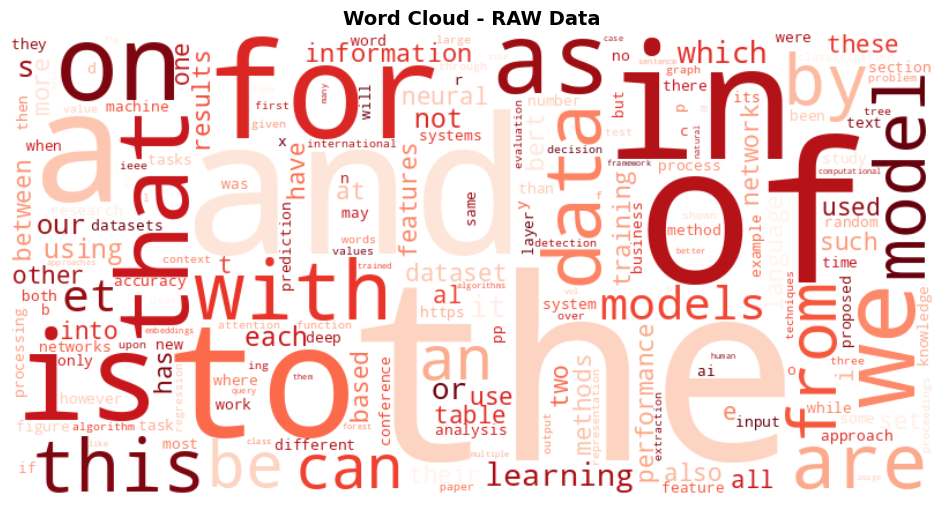

In [12]:
# Word Cloud visualisasi
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds'
).generate_from_frequencies(word_freq) 

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - RAW Data", fontsize=14, fontweight='bold')

# Simpan ke file PNG 
plt.savefig("wordcloud_raw.png", format='png', bbox_inches='tight')
plt.show()

### Panjang Kalimat (Sentence Length Distribution)

✅ Disimpan sebagai 'sentence_length_distribution_cleaned.png'


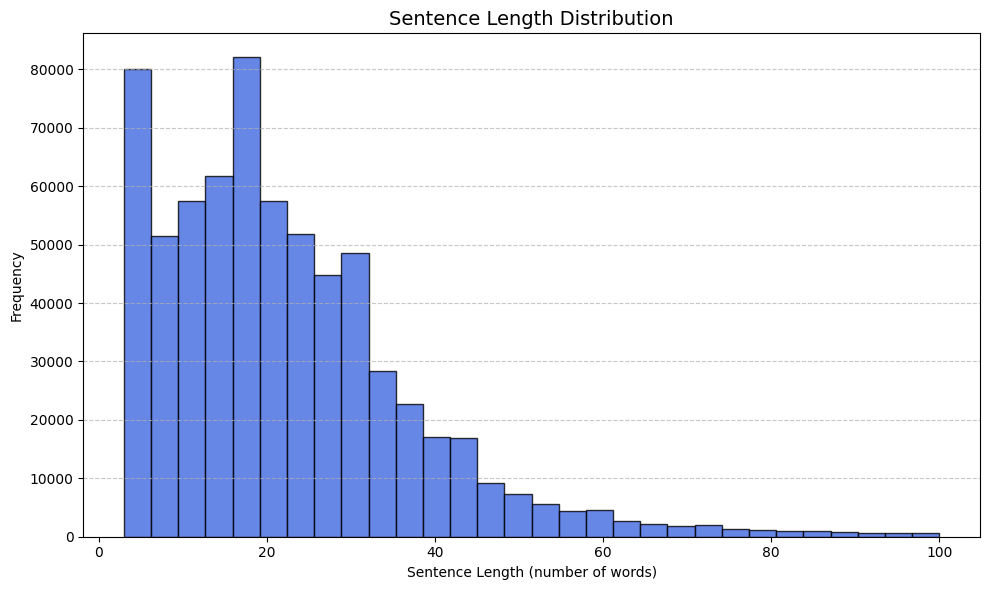

In [10]:
# List untuk menyimpan panjang setiap kalimat
sentence_lengths = []

# Looping per dokumen di full_text
for text in data_raw['full_text'].dropna():
    sentences = sent_tokenize(text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        length = len(words)
        if 3 <= length <= 100:
            sentence_lengths.append(length)

sentence_lengths = np.array(sentence_lengths)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=30, color='royalblue', edgecolor='black', alpha=0.8)
plt.title("Sentence Length Distribution", fontsize=14)
plt.xlabel("Sentence Length (number of words)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Simpan gambar
plt.savefig("sentence_length_distribution_cleaned.png", dpi=300)
print("✅ Disimpan sebagai 'sentence_length_distribution_cleaned.png'")

# Tampilkan
plt.show()

## Exploratory Data Analysis (EDA) Preprocessing

In [56]:
data_final = pd.read_csv("/kaggle/input/data-preprocess/data_prepocessing fix.csv")
data_final

,Title,Link,Published,PDF Link,Authors,Summary,full_text,clean_full_text,clean_summary,corrected_full_text,corrected_summary,tokens,tokens_summary,tokens_no_stopwords,tokens_summary_no_stopwords,tokens_text_lemmatized,tokens_summary_lemmatized
0,Clinical Trial Information Extraction with BERT,http://arxiv.org/abs/2110.10027v1,2021-09-11T17:15:10Z,http://arxiv.org/pdf/2110.10027v1,"Xiong Liu, Greg L. Hersch, Iya Khalil, Murthy ...",Natural language processing (NLP) of clinical ...,\n Clinical Trial Information Extraction with...,Clinical Trial Information Extraction with BER...,Natural language processing NLP of clinical tr...,clinical trial information extraction with BER...,natural language processing NLP of clinical tr...,"['clinical', 'trial', 'information', 'extracti...","['natural', 'language', 'processing', 'nlp', '...","['clinical', 'trial', 'information', 'extracti...","['natural', 'language', 'processing', 'nlp', '...","['clinical', 'trial', 'information', 'extracti...","['natural', 'language', 'processing', 'nlp', '..."
1,FinBERT-MRC: financial named entity recognitio...,http://arxiv.org/abs/2205.15485v1,2022-05-31T00:44:57Z,http://arxiv.org/pdf/2205.15485v1,"Yuzhe Zhang, Hong Zhang",Financial named entity recognition (FinNER) fr...,ARTICLE TEMPLATE\nFinBERT-MRC: nancial named ...,FinBERTMRC nancial named entity recognition us...,Financial named entity recognition FinNER from...,FinBERTMRC financial named entity recognition ...,financial named entity recognition FinNER from...,"['finbertmrc', 'financial', 'named', 'entity',...","['financial', 'named', 'entity', 'recognition'...","['finbertmrc', 'financial', 'named', 'entity',...","['financial', 'named', 'entity', 'recognition'...","['finbertmrc', 'financial', 'name', 'entity', ...","['financial', 'name', 'entity', 'recognition',..."
2,German BERT Model for Legal Named Entity Recog...,http://arxiv.org/abs/2303.05388v1,2023-03-07T11:54:39Z,http://arxiv.org/pdf/2303.05388v1,"Harshil Darji, Jelena Mitrović, Michael Granitzer","The use of BERT, one of the most popular langu...",arXiv:2303.05388v1 [cs.CL] 7 Mar 2023German ...,arXiv.v cs.CL Mar German BERT Model for Legal ...,"The use of BERT, one of the most popular langu...",arXiv.v cs.CL car german BERT model for legal ...,"the use of BERT, one of the most popular langu...","['arxiv.v', 'cs.cl', 'car', 'german', 'bert', ...","['the', 'use', 'of', 'bert', ',', 'one', 'of',...","['arxiv.v', 'cs.cl', 'car', 'german', 'bert', ...","['use', 'bert', ',', 'one', 'popular', 'langua...","['arxiv.v', 'cs.cl', 'car', 'german', 'bert', ...","['use', 'bert', ',', 'one', 'popular', 'langua..."
3,WCL-BBCD: A Contrastive Learning and Knowledge...,http://arxiv.org/abs/2203.06925v5,2022-03-14T08:29:58Z,http://arxiv.org/pdf/2203.06925v5,"Renjie Zhou, Qiang Hu, Jian Wan, Jilin Zhang, ...",Named Entity Recognition task is one of the co...,1\nWCL-BBCD: A Contrastive Learning and\nKnowl...,WCLBBCD A Contrastive Learning and Knowledge G...,Named Entity Recognition task is one of the co...,WCLBBCD a contrastive learning and knowledge g...,named entity recognition task is one of the co...,"['wclbbcd', 'a', 'contrastive', 'learning', 'a...","['named', 'entity', 'recognition', 'task', 'is...","['wclbbcd', 'contrastive', 'learning', 'knowle...","['named', 'entity', 'recognition', 'task', 'on...","['wclbbcd', 'contrastive', 'learning', 'knowle...","['name', 'entity', 'recognition', 'task', 'one..."
4,Supplementary Features of BiLSTM for Enhanced ...,http://arxiv.org/abs/2305.19928v4,2023-05-31T15:05:25Z,http://arxiv.org/pdf/2305.19928v4,"Conglei Xu, Kun Shen, Hongguang Sun",Sequence labeling tasks require the computatio...,1\nSupplementary Features of BiLSTM for Enhanc...,Supplementary Features of BiLSTM for Enhanced ...,Sequence labeling tasks require the computatio...,supplementary features of BiLSTM for enhanced ...,sequence labelling tasks require the computati...,"['supplementary', 'features', 'of', 'bilstm', ...","['sequence', 'labelling', 'tas

### Distribusi Frekuensi Kata

In [62]:
data_final['tokens_text_lemmatized'] = data_final['tokens_text_lemmatized'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Gabungkan semua token
all_tokens = list(itertools.chain.from_iterable(data_final['tokens_text_lemmatized']))

# Hapus token yang bukan huruf alfabet 
clean_tokens = [token for token in all_tokens if re.fullmatch(r"[a-zA-Z]+", token)]

# Hitung frekuensi
word_freq = Counter(clean_tokens)

# Tampilkan top 20 kata
top_words_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Count'])
print(top_words_df.to_string(index=False))

# Simpan ke file teks
with open("word_counts.txt", "w") as f:
    for word in top_words_df.itertuples(index=False):
        f.write(f"{word.Word}: {word.Count}\n")

print("✅ Word counts saved to word_counts.txt")

       Word  Count
      model 102676
       data  74534
      learn  36822
    network  29660
    feature  28679
     method  28285
     result  26492
     system  25843
       base  25104
information  25076
       task  24421
        set  23029
    process  21979
performance  21411
      class  21313
    dataset  20540
        use  20496
      train  20256
   language  20192
       time  20183
✅ Word counts saved to word_counts.txt


### Visualisasi Word Cloud

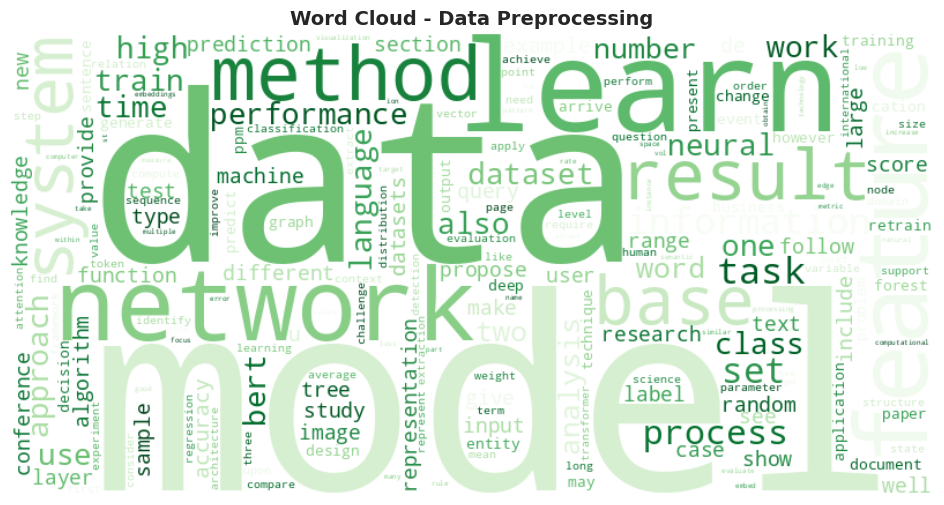

In [65]:
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Greens'
).generate_from_frequencies(word_freq)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Data Preprocessing", fontsize=14, fontweight='bold')
plt.savefig("wordcloud_preprocessing.png", format='png', bbox_inches='tight')
plt.show()

### Panjang Kalimat (Sentence Length Distribution)

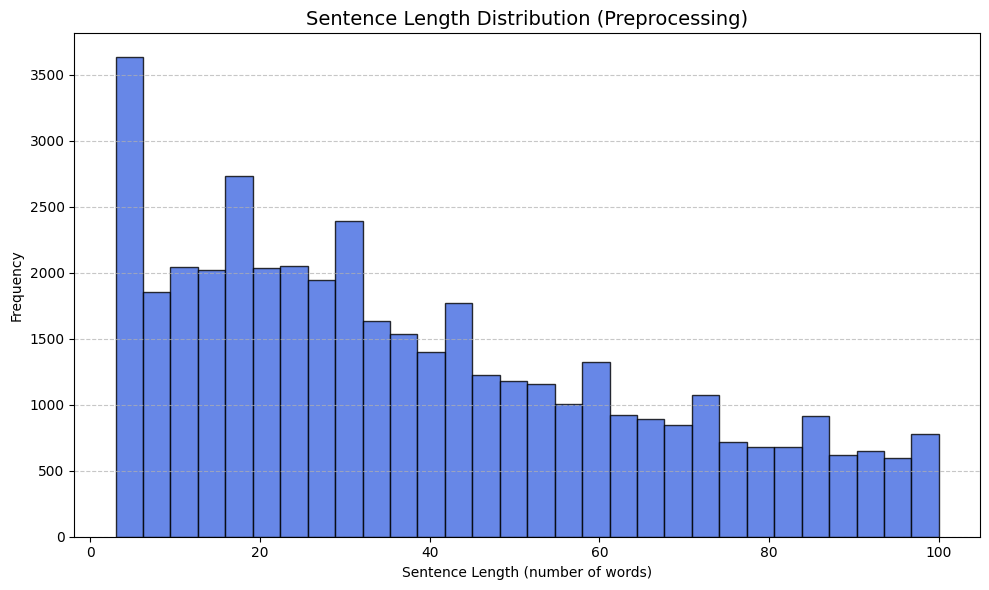

In [9]:
# List untuk menyimpan panjang setiap kalimat
sentence_lengths = []

# Proses per dokumen
for text in data_final['corrected_full_text'].dropna():
    sentences = sent_tokenize(text) 
    for sentence in sentences:
        words = word_tokenize(sentence)  
        length = len(words)
        if 3 <= length <= 100:  
            sentence_lengths.append(length)

sentence_lengths = np.array(sentence_lengths)

# Visualisasi histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=30, color='royalblue', edgecolor='black', alpha=0.8)
plt.title("Sentence Length Distribution (Preprocessing)", fontsize=14)
plt.xlabel("Sentence Length (number of words)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("sentence_length_distribution_cleaned.png", dpi=300)
plt.show()

## Model BART

In [14]:
data_final = pd.read_csv("/kaggle/input/data-preprocess/data_prepocessing fix.csv")
data_final

,Title,Link,Published,PDF Link,Authors,Summary,full_text,clean_full_text,clean_summary,corrected_full_text,corrected_summary,tokens,tokens_summary,tokens_no_stopwords,tokens_summary_no_stopwords,tokens_text_lemmatized,tokens_summary_lemmatized
0,Clinical Trial Information Extraction with BERT,http://arxiv.org/abs/2110.10027v1,2021-09-11T17:15:10Z,http://arxiv.org/pdf/2110.10027v1,"Xiong Liu, Greg L. Hersch, Iya Khalil, Murthy ...",Natural language processing (NLP) of clinical ...,\n Clinical Trial Information Extraction with...,Clinical Trial Information Extraction with BER...,Natural language processing NLP of clinical tr...,clinical trial information extraction with BER...,natural language processing NLP of clinical tr...,"['clinical', 'trial', 'information', 'extracti...","['natural', 'language', 'processing', 'nlp', '...","['clinical', 'trial', 'information', 'extracti...","['natural', 'language', 'processing', 'nlp', '...","['clinical', 'trial', 'information', 'extracti...","['natural', 'language', 'processing', 'nlp', '..."
1,FinBERT-MRC: financial named entity recognitio...,http://arxiv.org/abs/2205.15485v1,2022-05-31T00:44:57Z,http://arxiv.org/pdf/2205.15485v1,"Yuzhe Zhang, Hong Zhang",Financial named entity recognition (FinNER) fr...,ARTICLE TEMPLATE\nFinBERT-MRC: nancial named ...,FinBERTMRC nancial named entity recognition us...,Financial named entity recognition FinNER from...,FinBERTMRC financial named entity recognition ...,financial named entity recognition FinNER from...,"['finbertmrc', 'financial', 'named', 'entity',...","['financial', 'named', 'entity', 'recognition'...","['finbertmrc', 'financial', 'named', 'entity',...","['financial', 'named', 'entity', 'recognition'...","['finbertmrc', 'financial', 'name', 'entity', ...","['financial', 'name', 'entity', 'recognition',..."
2,German BERT Model for Legal Named Entity Recog...,http://arxiv.org/abs/2303.05388v1,2023-03-07T11:54:39Z,http://arxiv.org/pdf/2303.05388v1,"Harshil Darji, Jelena Mitrović, Michael Granitzer","The use of BERT, one of the most popular langu...",arXiv:2303.05388v1 [cs.CL] 7 Mar 2023German ...,arXiv.v cs.CL Mar German BERT Model for Legal ...,"The use of BERT, one of the most popular langu...",arXiv.v cs.CL car german BERT model for legal ...,"the use of BERT, one of the most popular langu...","['arxiv.v', 'cs.cl', 'car', 'german', 'bert', ...","['the', 'use', 'of', 'bert', ',', 'one', 'of',...","['arxiv.v', 'cs.cl', 'car', 'german', 'bert', ...","['use', 'bert', ',', 'one', 'popular', 'langua...","['arxiv.v', 'cs.cl', 'car', 'german', 'bert', ...","['use', 'bert', ',', 'one', 'popular', 'langua..."
3,WCL-BBCD: A Contrastive Learning and Knowledge...,http://arxiv.org/abs/2203.06925v5,2022-03-14T08:29:58Z,http://arxiv.org/pdf/2203.06925v5,"Renjie Zhou, Qiang Hu, Jian Wan, Jilin Zhang, ...",Named Entity Recognition task is one of the co...,1\nWCL-BBCD: A Contrastive Learning and\nKnowl...,WCLBBCD A Contrastive Learning and Knowledge G...,Named Entity Recognition task is one of the co...,WCLBBCD a contrastive learning and knowledge g...,named entity recognition task is one of the co...,"['wclbbcd', 'a', 'contrastive', 'learning', 'a...","['named', 'entity', 'recognition', 'task', 'is...","['wclbbcd', 'contrastive', 'learning', 'knowle...","['named', 'entity', 'recognition', 'task', 'on...","['wclbbcd', 'contrastive', 'learning', 'knowle...","['name', 'entity', 'recognition', 'task', 'one..."
4,Supplementary Features of BiLSTM for Enhanced ...,http://arxiv.org/abs/2305.19928v4,2023-05-31T15:05:25Z,http://arxiv.org/pdf/2305.19928v4,"Conglei Xu, Kun Shen, Hongguang Sun",Sequence labeling tasks require the computatio...,1\nSupplementary Features of BiLSTM for Enhanc...,Supplementary Features of BiLSTM for Enhanced ...,Sequence labeling tasks require the computatio...,supplementary features of BiLSTM for enhanced ...,sequence labelling tasks require the computati...,"['supplementary', 'features', 'of', 'bilstm', ...","['sequence', 'labelling', 'tas

In [15]:
data_final['text_lemmatized_joined'] = data_final['tokens_text_lemmatized'].apply(
    lambda x: ' '.join(ast.literal_eval(x))
)
data_final['summary_lemmatized_joined'] = data_final['tokens_summary_lemmatized'].apply(
    lambda x: ' '.join(ast.literal_eval(x))
)

print(data_final[['text_lemmatized_joined', 'summary_lemmatized_joined']].head())

                              text_lemmatized_joined  \
0  clinical trial information extraction bert lon...   
1  finbertmrc financial name entity recognition b...   
2  arxiv.v cs.cl car german bert model legal name...   
3  wclbbcd contrastive learning knowledge graph a...   
4  supplementary feature bilstm enhanced sequence...   

                           summary_lemmatized_joined  
0  natural language processing nlp clinical trial...  
1  financial name entity recognition finner liter...  
2  use bert , one popular language model lead imp...  
3  name entity recognition task one core task inf...  
4  sequence label task require computation senten...  


In [16]:
# Memilih kolom yang digunakan  
texts = data_final["text_lemmatized_joined"].tolist()
summaries = data_final["summary_lemmatized_joined"].tolist()
titles = data_final["Title"].tolist()

## Data Splitting

In [17]:
# Membagi Dataset Menjadi Train (80%) dan Test (20%)
data_split = data_final[["Title", "text_lemmatized_joined", "summary_lemmatized_joined"]].copy()

# Split data
train_data, test_data = train_test_split(
    data_split,
    test_size=0.2,
    random_state=42
)

# Ekstrak kembali jadi list 
train_titles = train_data["Title"].tolist()
train_texts = train_data["text_lemmatized_joined"].tolist()
train_summaries = train_data["summary_lemmatized_joined"].tolist()

test_titles = test_data["Title"].tolist()
test_texts = test_data["text_lemmatized_joined"].tolist()
test_summaries = test_data["summary_lemmatized_joined"].tolist()

# Cek hasil
print(f"Train samples: {len(train_texts)}")
print(f"Test samples: {len(test_texts)}")

Train samples: 1854
Test samples: 464


## Tokenizer Model BART

In [10]:
# Load model dan tokenizer BART
model_name = "facebook/bart-large-cnn"

tokenizer = BartTokenizer.from_pretrained(model_name)  
model = BartForConditionalGeneration.from_pretrained(model_name)

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [11]:
# Load ROUGE metric
rouge = evaluate.load("rouge")

In [12]:
# Tokenisasi input (text) 
train_inputs = tokenizer(
    train_texts,
    padding=True,
    truncation=True,
    max_length=1024,
    return_tensors="pt"
)

test_inputs = tokenizer(
    test_texts,
    padding=True,
    truncation=True,
    max_length=1024,
    return_tensors="pt"
)

# Tokenisasi target/output (summary)
train_labels = tokenizer(
    train_summaries,
    padding=True,
    truncation=True,
    max_length=256,
    return_tensors="pt"
)

test_labels = tokenizer(
    test_summaries,
    padding=True,
    truncation=True,
    max_length=256,
    return_tensors="pt"
)

In [13]:
# Periksa apakah jumlah token dan label sesuai
assert len(train_inputs["input_ids"]) == len(train_labels["input_ids"]), \
    "Train: Jumlah input dan label tidak sesuai."
assert len(test_inputs["input_ids"]) == len(test_labels["input_ids"]), \
    "Test: Jumlah input dan label tidak sesuai."

In [14]:
# Convert to list
train_dataset = Dataset.from_dict({
    "input_ids": train_inputs["input_ids"].tolist(),
    "attention_mask": train_inputs["attention_mask"].tolist(),
    "labels": train_labels["input_ids"].tolist()
})

test_dataset = Dataset.from_dict({
    "input_ids": test_inputs["input_ids"].tolist(),
    "attention_mask": test_inputs["attention_mask"].tolist(),
    "labels": test_labels["input_ids"].tolist()
})

In [15]:
# Final Check
print(f"Dataset Final -> Train: {len(train_dataset)}, Test: {len(test_dataset)}")

Dataset Final -> Train: 1854, Test: 464


## Pelatihan Model BART

In [16]:
# Data collator untuk model BART
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model) 

In [17]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred  

    # Memastikan labels dalam bentuk list
    if isinstance(labels, torch.Tensor):
        labels = labels.tolist()

    # Jika sudah dalam bentuk ID, predictions tidak diproses
    if isinstance(predictions, torch.Tensor):
        predictions = predictions.tolist()
    elif isinstance(predictions, np.ndarray):
        predictions = predictions.tolist()

    labels = [
        [token if token != -100 else tokenizer.pad_token_id for token in label] 
        for label in labels
    ]

    # Decode prediksi dan label
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Bersihkan spasi
    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    # Hitung ROUGE
    result = rouge.compute(
        predictions=decoded_preds, 
        references=decoded_labels,
        use_stemmer=True
    )

    # F-measure
    result = {key: value.mid.fmeasure for key, value in result.items()}

    return result

In [18]:
training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,

    # Logging
    logging_dir='./logs',
    logging_strategy="epoch",  
    logging_first_step=False,

    # Saving
    save_strategy="epoch",
    save_total_limit=2,
    load_best_model_at_end=False,

    # Hyperparams
    learning_rate=1e-5,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=12,
    per_device_eval_batch_size=4, 
    num_train_epochs=5,
    weight_decay=0.01,
    max_grad_norm=1.0,
    fp16=True,

    report_to="none"
)

In [19]:
# Inisialisasi Trainer
trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,  
)

In [25]:
# Jalankan training (epoch 5, batch size train 24, test 4)
trainer.train()

Step,Training Loss
78,0.339500
156,0.241100
234,0.200700
312,0.180300
390,0.168800


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3685: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=390, training_loss=0.2260880714807755, metrics={'train_runtime': 3204.2639, 'train_samples_per_second': 2.893, 'train_steps_per_second': 0.122, 'total_flos': 2.403319003742208e+16, 'train_loss': 0.2260880714807755, 'epoch': 5.0})

#### Visualisasi Training Loss

In [27]:
data_1e_4 = [
    {"epoch": 1, "lr": 1e-4, "bs_train": 8, "bs_test": 4, "loss": 0.125},
    {"epoch": 2, "lr": 1e-4, "bs_train": 8, "bs_test": 4, "loss": 0.094},
    {"epoch": 3, "lr": 1e-4, "bs_train": 8, "bs_test": 4,"loss": 0.049},
    {"epoch": 4, "lr": 1e-4, "bs_train": 8, "bs_test": 4, "loss": 0.022},
    {"epoch": 5, "lr": 1e-4, "bs_train": 8, "bs_test": 4, "loss": 0.009},

    {"epoch": 1, "lr": 1e-4, "bs_train": 8, "bs_test": 8, "loss": 0.034},
    {"epoch": 2, "lr": 1e-4, "bs_train": 8, "bs_test": 8, "loss": 0.032},
    {"epoch": 3, "lr": 1e-4, "bs_train": 8, "bs_test": 8,"loss": 0.024},
    {"epoch": 4, "lr": 1e-4, "bs_train": 8, "bs_test": 8, "loss": 0.009},
    {"epoch": 5, "lr": 1e-4, "bs_train": 8, "bs_test": 8, "loss": 0.003},

    {"epoch": 1, "lr": 1e-4, "bs_train": 8, "bs_test": 12, "loss": 0.019},
    {"epoch": 2, "lr": 1e-4, "bs_train": 8, "bs_test": 12, "loss": 0.019},
    {"epoch": 3, "lr": 1e-4, "bs_train": 8, "bs_test": 12,"loss": 0.018},
    {"epoch": 4, "lr": 1e-4, "bs_train": 8, "bs_test": 12, "loss": 0.005},
    {"epoch": 5, "lr": 1e-4, "bs_train": 8, "bs_test": 12, "loss": 0.002},

    {"epoch": 1, "lr": 1e-4, "bs_train": 16, "bs_test": 4, "loss": 0.211},
    {"epoch": 2, "lr": 1e-4, "bs_train": 16, "bs_test": 4, "loss": 0.126},
    {"epoch": 3, "lr": 1e-4, "bs_train": 16, "bs_test": 4,"loss": 0.073},
    {"epoch": 4, "lr": 1e-4, "bs_train": 16, "bs_test": 4, "loss": 0.039},
    {"epoch": 5, "lr": 1e-4, "bs_train": 16, "bs_test": 4, "loss": 0.019},

    {"epoch": 1, "lr": 1e-4, "bs_train": 16, "bs_test": 8, "loss": 0.049},
    {"epoch": 2, "lr": 1e-4, "bs_train": 16, "bs_test": 8, "loss": 0.043},
    {"epoch": 3, "lr": 1e-4, "bs_train": 16, "bs_test": 8,"loss": 0.018},
    {"epoch": 4, "lr": 1e-4, "bs_train": 16, "bs_test": 8, "loss": 0.008},
    {"epoch": 5, "lr": 1e-4, "bs_train": 16, "bs_test": 8, "loss": 0.003},

    {"epoch": 1, "lr": 1e-4, "bs_train": 16, "bs_test": 12, "loss": 0.020},
    {"epoch": 2, "lr": 1e-4, "bs_train": 16, "bs_test": 12, "loss": 0.020},
    {"epoch": 3, "lr": 1e-4, "bs_train": 16, "bs_test": 12,"loss": 0.010},
    {"epoch": 4, "lr": 1e-4, "bs_train": 16, "bs_test": 12, "loss": 0.004},
    {"epoch": 5, "lr": 1e-4, "bs_train": 16, "bs_test": 12, "loss": 0.002},

    {"epoch": 1, "lr": 1e-4, "bs_train": 24, "bs_test": 4, "loss": 0.010},
    {"epoch": 2, "lr": 1e-4, "bs_train": 24, "bs_test": 4, "loss": 0.010},
    {"epoch": 3, "lr": 1e-4, "bs_train": 24, "bs_test": 4,"loss": 0.005},
    {"epoch": 4, "lr": 1e-4, "bs_train": 24, "bs_test": 4, "loss": 0.002},
    {"epoch": 5, "lr": 1e-4, "bs_train": 24, "bs_test": 4, "loss": 0.001},

    {"epoch": 1, "lr": 1e-4, "bs_train": 24, "bs_test": 8, "loss": 0.010},
    {"epoch": 2, "lr": 1e-4, "bs_train": 24, "bs_test": 8, "loss": 0.009},
    {"epoch": 3, "lr": 1e-4, "bs_train": 24, "bs_test": 8,"loss": 0.004},
    {"epoch": 4, "lr": 1e-4, "bs_train": 24, "bs_test": 8, "loss": 0.002},
    {"epoch": 5, "lr": 1e-4, "bs_train": 24, "bs_test": 8, "loss": 0.001},

    {"epoch": 1, "lr": 1e-4, "bs_train": 24, "bs_test": 12, "loss": 0.008},
    {"epoch": 2, "lr": 1e-4, "bs_train": 24, "bs_test": 12, "loss": 0.006},
    {"epoch": 3, "lr": 1e-4, "bs_train": 24, "bs_test": 12,"loss": 0.004},
    {"epoch": 4, "lr": 1e-4, "bs_train": 24, "bs_test": 12, "loss": 0.002},
    {"epoch": 5, "lr": 1e-4, "bs_train": 24, "bs_test": 12, "loss": 0.001},
]

df = pd.DataFrame(data_1e_4)

In [28]:
data_1e_5 = [
    {"epoch": 1, "lr": 1e-5, "bs_train": 8, "bs_test": 4, "loss": 0.0010},
    {"epoch": 2, "lr": 1e-5, "bs_train": 8, "bs_test": 4, "loss": 0.0012},
    {"epoch": 3, "lr": 1e-5, "bs_train": 8, "bs_test": 4, "loss": 0.0008},
    {"epoch": 4, "lr": 1e-5, "bs_train": 8, "bs_test": 4, "loss": 0.0005},
    {"epoch": 5, "lr": 1e-5, "bs_train": 8, "bs_test": 4, "loss": 0.0004},

    {"epoch": 1, "lr": 1e-5, "bs_train": 8, "bs_test": 8, "loss": 0.0001},
    {"epoch": 2, "lr": 1e-5, "bs_train": 8, "bs_test": 8, "loss": 0.0005},
    {"epoch": 3, "lr": 1e-5, "bs_train": 8, "bs_test": 8, "loss": 0.0003},
    {"epoch": 4, "lr": 1e-5, "bs_train": 8, "bs_test": 8, "loss": 0.0002},
    {"epoch": 5, "lr": 1e-5, "bs_train": 8, "bs_test": 8, "loss": 0.0003},

    {"epoch": 1, "lr": 1e-5, "bs_train": 8, "bs_test": 12, "loss": 0.0001},
    {"epoch": 2, "lr": 1e-5, "bs_train": 8, "bs_test": 12, "loss": 0.0003},
    {"epoch": 3, "lr": 1e-5, "bs_train": 8, "bs_test": 12, "loss": 0.0002},
    {"epoch": 4, "lr": 1e-5, "bs_train": 8, "bs_test": 12, "loss": 0.0001},
    {"epoch": 5, "lr": 1e-5, "bs_train": 8, "bs_test": 12, "loss": 0.0002},

    {"epoch": 1, "lr": 1e-5, "bs_train": 16, "bs_test": 4, "loss": 0.0001},
    {"epoch": 2, "lr": 1e-5, "bs_train": 16, "bs_test": 4, "loss": 0.0001},
    {"epoch": 3, "lr": 1e-5, "bs_train": 16, "bs_test": 4, "loss": 0.0001},
    {"epoch": 4, "lr": 1e-5, "bs_train": 16, "bs_test": 4, "loss": 0.0001},
    {"epoch": 5, "lr": 1e-5, "bs_train": 16, "bs_test": 4, "loss": 0.0001},

    {"epoch": 1, "lr": 1e-5, "bs_train": 16, "bs_test": 8, "loss": 0.0001},
    {"epoch": 2, "lr": 1e-5, "bs_train": 16, "bs_test": 8, "loss": 0.0001},
    {"epoch": 3, "lr": 1e-5, "bs_train": 16, "bs_test": 8, "loss": 0.0001},
    {"epoch": 4, "lr": 1e-5, "bs_train": 16, "bs_test": 8, "loss": 0.0001},
    {"epoch": 5, "lr": 1e-5, "bs_train": 16, "bs_test": 8, "loss": 0.0001},

    {"epoch": 1, "lr": 1e-5, "bs_train": 16, "bs_test": 12, "loss": 0.2836},
    {"epoch": 2, "lr": 1e-5, "bs_train": 16, "bs_test": 12, "loss": 0.2097},
    {"epoch": 3, "lr": 1e-5, "bs_train": 16, "bs_test": 12, "loss": 0.1771},
    {"epoch": 4, "lr": 1e-5, "bs_train": 16, "bs_test": 12, "loss": 0.1577},
    {"epoch": 5, "lr": 1e-5, "bs_train": 16, "bs_test": 12, "loss": 0.1470},

    {"epoch": 1, "lr": 1e-5, "bs_train": 24, "bs_test": 4, "loss": 0.1414},
    {"epoch": 2, "lr": 1e-5, "bs_train": 24, "bs_test": 4, "loss": 0.1266},
    {"epoch": 3, "lr": 1e-5, "bs_train": 24, "bs_test": 4, "loss": 0.1136},
    {"epoch": 4, "lr": 1e-5, "bs_train": 24, "bs_test": 4, "loss": 0.1044},
    {"epoch": 5, "lr": 1e-5, "bs_train": 24, "bs_test": 4, "loss": 0.0989},

    {"epoch": 1, "lr": 1e-5, "bs_train": 24, "bs_test": 8, "loss": 0.0821},
    {"epoch": 2, "lr": 1e-5, "bs_train": 24, "bs_test": 8, "loss": 0.0731},
    {"epoch": 3, "lr": 1e-5, "bs_train": 24, "bs_test": 8, "loss": 0.0661},
    {"epoch": 4, "lr": 1e-5, "bs_train": 24, "bs_test": 8, "loss": 0.0627},
    {"epoch": 5, "lr": 1e-5, "bs_train": 24, "bs_test": 8, "loss": 0.0629},

    {"epoch": 1, "lr": 1e-5, "bs_train": 24, "bs_test": 12, "loss": 0.0397},
    {"epoch": 2, "lr": 1e-5, "bs_train": 24, "bs_test": 12, "loss": 0.0359},
    {"epoch": 3, "lr": 1e-5, "bs_train": 24, "bs_test": 12, "loss": 0.0332},
    {"epoch": 4, "lr": 1e-5, "bs_train": 24, "bs_test": 12, "loss": 0.0333},
    {"epoch": 5, "lr": 1e-5, "bs_train": 24, "bs_test": 12, "loss": 0.0377},
]

df = pd.DataFrame(data_1e_5)

In [42]:
# Learning rate 1e-4
data_1e_4 = pd.DataFrame(data_1e_4)

# Pastikan epoch, bs_train, dan bs_test bertipe int
data_1e_4["epoch"] = data_1e_4["epoch"].astype(int)
data_1e_4["bs_train"] = data_1e_4["bs_train"].astype(int)
data_1e_4["bs_test"] = data_1e_4["bs_test"].astype(int)

# Baru buat kolom kombinasi
data_1e_4["combination"] = data_1e_4.apply(lambda row: f"train{row.bs_train}_test{row.bs_test}", axis=1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

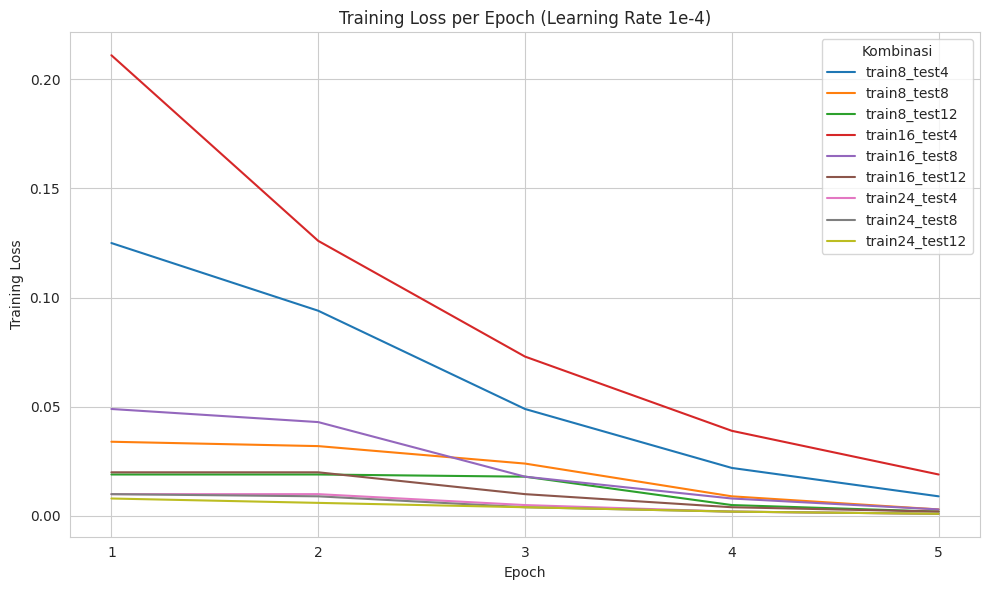

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_1e_4, x="epoch", y="loss", hue="combination")

plt.xticks([1, 2, 3, 4, 5])
plt.title("Training Loss per Epoch (Learning Rate 1e-4)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(title="Kombinasi")
plt.grid(True)
plt.tight_layout()

# Simpan ke file PNG (pastikan sebelum plt.show())
plt.savefig("training_loss_1e-4.png", format='png', bbox_inches='tight')
plt.show()

In [44]:
# Learning rate 1e-5
data_1e_5 = pd.DataFrame(data_1e_5)

# Pastikan epoch, bs_train, dan bs_test bertipe int
data_1e_5["epoch"] = data_1e_5["epoch"].astype(int)
data_1e_5["bs_train"] = data_1e_5["bs_train"].astype(int)
data_1e_5["bs_test"] = data_1e_5["bs_test"].astype(int)

# Baru buat kolom kombinasi
data_1e_5["combination"] = data_1e_5.apply(lambda row: f"train{row.bs_train}_test{row.bs_test}", axis=1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

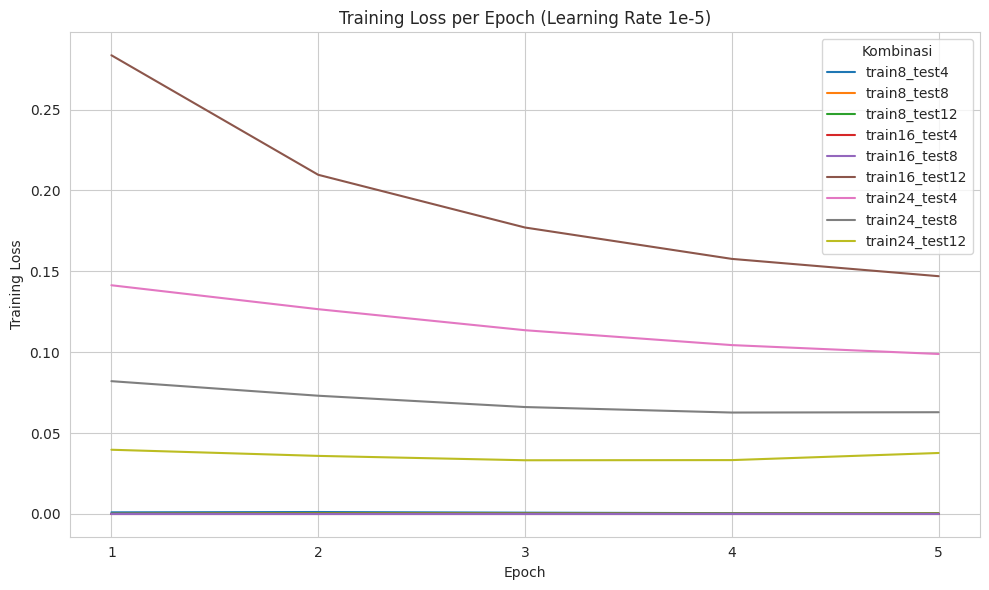

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_1e_5, x="epoch", y="loss", hue="combination")

plt.xticks([1, 2, 3, 4, 5])
plt.title("Training Loss per Epoch (Learning Rate 1e-5)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(title="Kombinasi")
plt.grid(True)
plt.tight_layout()

# Simpan ke file PNG 
plt.savefig("trainig_loss_1e-5.png", format='png', bbox_inches='tight')
plt.show()

## Evaluasi Model BART

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        

In [25]:
def split_into_chunks(text, tokenizer, max_tokens=512, stride=256):
    tokens = tokenizer.encode(text, truncation=False)
    chunks = []
    start = 0
    while start < len(tokens): 
        end = min(start + max_tokens, len(tokens))
        chunk = tokens[start:end]
        decoded_chunk = tokenizer.decode(chunk, skip_special_tokens=True)
        chunks.append(decoded_chunk)
        if end == len(tokens):
            break
        start += stride
    return chunks

In [26]:
def clean_summary(text):
    sentences = sent_tokenize(text)
    cleaned = ' '.join([s.strip().capitalize() for s in sentences])
    return cleaned

In [27]:
def bart_summarize(input_text, tokenizer, model, num_beams=4, num_words=150):
    try:
        input_text = ' '.join(input_text.split()) 
        inputs = tokenizer(
            input_text,
            truncation=True, 
            max_length=1024,
            return_tensors='pt'
        ).to(model.device)

        summary_ids = model.generate(
            inputs['input_ids'],
            num_beams=num_beams,
            no_repeat_ngram_size=3,
            length_penalty=1.5,
            min_length=30,
            max_length=num_words,
            early_stopping=True
        )

        output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        return clean_summary(output.strip())

    except Exception as e:
        print(f"⚠️ Error saat merangkum: {e}")
        return "Ringkasan tidak tersedia karena error"

In [28]:
def sliding_summary_with_bart_summarize(
    text, tokenizer, model,
    chunk_size=512, stride=256,
    intermediate_words=100, final_words=120, num_beams=4
):
    chunks = split_into_chunks(text, tokenizer, max_tokens=chunk_size, stride=stride)
    partial_summaries = []

    for chunk in chunks:
        summary = bart_summarize(
            chunk, tokenizer, model,
            num_beams=num_beams,
            num_words=intermediate_words
        )
        partial_summaries.append(summary)

    combined_summary = ' '.join(partial_summaries)
    final_summary = bart_summarize(
        combined_summary, tokenizer, model,
        num_beams=num_beams,
        num_words=final_words
    )
    return final_summary.strip()

In [29]:
def generate_and_evaluate_with_rouge(
    test_texts, test_summaries, tokenizer, model, device,
    chunk_size=512, stride=256,
    intermediate_words=100, final_words=120, num_beams=4
):
    generated_summaries = []

    print("🚀 Generating summaries with sliding window + re-summarization...")
    for text in tqdm(test_texts, desc="📄 Generating Summaries"):
        summary = sliding_summary_with_bart_summarize(
            text, tokenizer, model,
            chunk_size=chunk_size,
            stride=stride,
            intermediate_words=intermediate_words,
            final_words=final_words,
            num_beams=num_beams
        )
        generated_summaries.append(summary)

    print("✅ Finished generating. Now computing ROUGE...")

    rouge_scores = rouge.compute(
        predictions=generated_summaries,
        references=test_summaries
    )

    return generated_summaries, rouge_scores

In [30]:
# Jalankan
generated_summaries, rouge_scores = generate_and_evaluate_with_rouge(
    test_texts, test_summaries, tokenizer, model, device
)

🚀 Generating summaries with sliding window + re-summarization...


📄 Generating Summaries: 100%|██████████| 464/464 [7:38:38<00:00, 59.31s/it]    


✅ Finished generating. Now computing ROUGE...


#### BATCH SIZE Train 24, Test 4, Learning Rate 1e-5

In [30]:
# Tampilkan skor ROUGE
print("📊 ROUGE scores:")
for key, score in rouge_scores.items():
    print(f"{key}: {score:.4f}")

📊 ROUGE scores:
rouge1: 0.6028
rouge2: 0.5207
rougeL: 0.5653
rougeLsum: 0.5655


In [31]:
# Tampilkan contoh hasil ringkasan
for i in range(3):
    print(f"\n📄 Judul Artikel:\n{test_titles[i]}")
    print(f"✅ Ringkasan Asli:\n{test_summaries[i]}")
    print(f"🤖 Ringkasan Model:\n{generated_summaries[i]}")
    print("=" * 100)


📄 Judul Artikel:
Clinical Trial Information Extraction with BERT
✅ Ringkasan Asli:
a large amount of data is produced every second from modern information systems such as mobile devices the world wide web internet of things social media etc analysis and mining of this massive data requires a lot of advanced tools and techniques therefore big data analytic and mining is currently an active and trending area of research because of the enormous benefits businesses and organizations derive from it numerous tools like pandas bumpy STATA, SPSS, have been created to help analyse and mine these huge outburst of data and some have become so popular and widely used in the field this paper presents a new pythonbased library DataSist, which offers high level intuitive and easy to use functions and methods that helps data scientistsanalyst to quickly analyses mine and visualize big data sets the objectives of this project were to i design a python library to aid data analysis process by abstractin

## Prediksi Model

In [77]:
# Load file CSV baru
data_predict = pd.read_csv("/kaggle/input/data-predict-model/data_prediction_fix.csv")
data_predict

,Title,Summary,Published,Link,PDF Link,Authors,Valid URL,full_text
0,"Deep, Deep Learning with BART",Purpose: To develop a deep-learning-based imag...,2022-02-28T18:23:41Z,http://arxiv.org/abs/2202.14005v2,http://arxiv.org/pdf/2202.14005v2,"Moritz Blumenthal, Guanxiong Luo, Martin Schil...",True,"Deep, Deep Learning with BART Moritz Blumentha..."
1,Adaptive network reliability analysis: Methodo...,Flow network models can capture the underlying...,2021-09-11T19:58:08Z,http://arxiv.org/abs/2109.05360v1,http://arxiv.org/pdf/2109.05360v1,"Nariman L. Dehghani, Soroush Zamanian, Abdolla...",True,-1- Adaptive network reliability analysis : Me...
2,Particle Gibbs for Bayesian Additive Regressio...,Additive regression trees are flexible non-par...,2015-02-16T16:48:30Z,http://arxiv.org/abs/1502.04622v1,http://arxiv.org/pdf/1502.04622v1,"Balaji Lakshminarayanan, Daniel M. Roy, Yee Wh...",True,Particle Gibbs for Bayesian Additive Regressio...


In [ ]:
test_titles = data_predict["Title"].tolist()
texts = data_predict['full_text'].tolist()
summaries = data_predict['Summary'].tolist()

In [24]:
def split_into_chunks(text, tokenizer, max_tokens=512, stride=256):
    tokens = tokenizer.encode(text, truncation=False)
    chunks = []
    start = 0
    while start < len(tokens):
        end = min(start + max_tokens, len(tokens))
        chunk = tokens[start:end]
        decoded_chunk = tokenizer.decode(chunk, skip_special_tokens=True)
        chunks.append(decoded_chunk)
        if end == len(tokens):
            break
        start += stride
    return chunks

In [25]:
def clean_summary(text):
    sentences = sent_tokenize(text)
    cleaned = ' '.join([s.strip().capitalize() for s in sentences])
    return cleaned

In [26]:
# Fungsi untuk merangkum teks
def bart_summarize(input_text, tokenizer, model, num_beams=4, num_words=150):
    try:
        input_text = ' '.join(input_text.split())  # Normalisasi spasi
        inputs = tokenizer(
            input_text,
            truncation=True,
            max_length=1024,
            return_tensors='pt'
        ).to(model.device)

        summary_ids = model.generate(
            inputs['input_ids'],
            num_beams=num_beams,
            no_repeat_ngram_size=3,
            length_penalty=1.5,
            min_length=30,
            max_length=num_words,
            early_stopping=True
        )

        output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        return clean_summary(output.strip())

    except Exception as e:
        print(f"⚠ Error saat merangkum: {e}")
        return "Ringkasan tidak tersedia karena error"

In [27]:
# Fungsi untuk ringkasan bertahap dari chunks
def sliding_summary_with_bart_summarize(
    text, tokenizer, model,
    chunk_size=512, stride=256,
    intermediate_words=100, final_words=120, num_beams=4
):
    chunks = split_into_chunks(text, tokenizer, max_tokens=chunk_size, stride=stride)
    partial_summaries = []

    for chunk in chunks:
        summary = bart_summarize(
            chunk, tokenizer, model,
            num_beams=num_beams,
            num_words=intermediate_words
        )
        partial_summaries.append(summary)

    combined_summary = ' '.join(partial_summaries)
    final_summary = bart_summarize(
        combined_summary, tokenizer, model,
        num_beams=num_beams,
        num_words=final_words
    )
    return final_summary.strip()

In [28]:
def generate_and_evaluate_with_rouge(
    test_texts, test_summaries, tokenizer, model, device,
    chunk_size=512, stride=256,
    intermediate_words=100, final_words=120, num_beams=4
):
    generated_summaries = []

    print("🚀 Generating summaries with sliding window + re-summarization...")
    for text in tqdm(test_texts, desc="📄 Generating Summaries"):
        summary = sliding_summary_with_bart_summarize(
            text, tokenizer, model,
            chunk_size=chunk_size,
            stride=stride,
            intermediate_words=intermediate_words,
            final_words=final_words,
            num_beams=num_beams
        )
        generated_summaries.append(summary)

    print("✅ Finished generating. Now computing ROUGE...")

    rouge_scores = rouge.compute(
        predictions=generated_summaries,
        references=test_summaries
    )

    return generated_summaries, rouge_scores

In [29]:
# Jalankan
generated_summaries, rouge_scores = generate_and_evaluate_with_rouge(
    texts, summaries, tokenizer, model, device
)

🚀 Generating summaries with sliding window + re-summarization...


📄 Generating Summaries: 100%|██████████| 5/5 [02:26<00:00, 29.24s/it]


✅ Finished generating. Now computing ROUGE...


In [45]:
# Tampilkan skor ROUGE  
print("📊 ROUGE scores:")
for key, score in rouge_scores.items():
    print(f"{key}: {score:.4f}")

📊 ROUGE scores:
rouge1: 0.4624
rouge2: 0.3414
rougeL: 0.4094
rougeLsum: 0.4094


In [31]:
text = texts[0]
reference = summaries[0]
generated = bart_summarize(text, tokenizer, model)

print("\n📄 Judul Artikel:\n", {test_titles[0]})
print("✅ Ringkasan Asli:\n", reference)
print("\n🤖 Ringkasan Model:\n", generated)


📄 Judul Artikel:
 {'Deep, Deep Learning with BART'}
✅ Ringkasan Asli:
 purpose to develop a deep-learning-based image reconstruction framework for reproducible research in mail methods the bart toolbox offers a rich set of implementations of calibration and reconstruction algorithms for parallel imaging and compressed sensing in this work bart was extended by a nonlinear operator framework that provides automatic differentiation to allow computation of gradients existing mri-specific operators of bart such as the nonuniform fast fourier transform are directly integrated into this framework and are complemented by common building blocks used in neural networks to evaluate the use of the framework for advanced deep-learning-based reconstruction two state-of-the-art unrolled reconstruction networks namely the variational network and model were implemented results state-of-the-art deep image-reconstruction networks can be constructed and trained using arts gradient based optimization algo